In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import torch
import numpy as np
import re
import underthesea # Thư viện tách từ
import pandas as pd
from sklearn.model_selection import train_test_split # Thư viện chia tách dữ liệu
from transformers import AutoModel, AutoTokenizer # Thư viện BERT
from underthesea import word_tokenize as word_tokenize_vn
# Thư viện train SVM
from sklearn.svm import SVC
from joblib import dump
from underthesea import sentiment
import re
import string
from underthesea import word_tokenize
import emoji  # Đảm bảo rằng thư viện này được cài đặt
from datetime import datetime, timedelta
import nltk
from symspellpy import SymSpell, Verbosity
import regex
import statistics 
import regex as re

In [3]:
import pandas as pd

# Đọc file Excel
df = pd.read_excel(r"C:\Users\HELLO\Downloads\Book1.xlsx")

# Loại bỏ các giá trị trong cột A nếu chúng xuất hiện trong cột B
df['C'] = df['A'].apply(lambda x: x if x not in df['B'].values else "")

# Lưu kết quả vào file mới
df.to_excel(r"C:\Users\HELLO\Downloads\Book2.xlsx", index=False)

In [2]:
ecommerce_data = pd.read_csv(r'D:\projects\NCKH\Data_Processing\Smarphones_TMĐT.csv')
sales_store_data = pd.read_csv(r'D:\projects\NCKH\Data_Processing\Smarphones_Shop.csv')
youtube = pd.read_csv(r"D:\projects\NCKH\Data Crawl\Trang MXH\Youtube\Youtube\Youtube_Smartphone.csv")

C:\Users\HELLO\AppData\Local\Temp\ipykernel_3524\960999013.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_store_data = pd.read_csv(r'D:\projects\NCKH\Data_Processing\Smarphones_Shop.csv')


In [3]:
ecommerce_data.head()

,Platform,Date_Crawl,brand,product_name,current_price,discount_price,discount,sold_quanlity,rating_count,time_comment,content_cmt,color,capacy
0,Lazada,2024-03-13,Apple,Apple iPhone 15,25.990.000 ₫,24.690.000 ₫,-5%,707,147,2023-11-14,Mua hàng chính hãng tại Apple flagship store t...,Pink,128GB
1,Lazada,2024-03-13,Apple,Apple iPhone 15,25.990.000 ₫,24.690.000 ₫,-5%,707,147,2023-12-02,Chất lượng: \n- Giao hàng nhanh. \n- SP đúng ...,Xanh dương,128GB
2,Lazada,2024-03-13,Apple,Apple iPhone 15,25.990.000 ₫,24.690.000 ₫,-5%,707,147,2024-04-15,"Shop chuẩn bị giao hàng nhanh, hình ảnh mang t...",Black,128GB
3,Lazada,2024-03-13,Apple,Apple iPhone 15,25.990.000 ₫,24.690.000 ₫,-5%,707,147,2023-10-17,"Giao hàng đúng hẹn, chất lượng máy tốt",Màu Xanh Lá Cây,256GB
4,Lazada,2024-03-13,Apple,Apple iPhone 15,25.990.000 ₫,24.690.000 ₫,-5%,707,147,2023-09-30,"Màu hồng cưng xiu, triệu like",Hồng,256GB


In [4]:
sales_store_data.head()

,Platform,Date_Crawl,product_name,current_price,discount_price,discount,rating_average,rating_count,time_comment,content_cmt,status,capacity,content_rate
0,FPT,2024-03-09,iPhone 15 Pro Max,34.990.000,30.990.000,11%,5-Apr,63,2024-03-30,"Dịch vụ tốt, chuyên nghiệp, máy thì đỉnh chóp",Đã mua,256GB,NaN
1,FPT,2024-03-09,iPhone 15 Pro Max,34.990.000,30.990.000,11%,5-Apr,63,2024-01-20,"Dịch vụ tốt, máy đa dạng và đủ màu nhé",Đã mua,256GB,NaN
2,FPT,2024-03-09,iPhone 15 Pro Max,34.990.000,30.990.000,11%,5-Apr,63,2024-01-19,Tuyệt vời,Đã mua,256GB,NaN
3,FPT,2024-03-09,iPhone 15 Pro Max,34.990.000,30.990.000,11%,5-Apr,63,2024-01-19,"Dịch vụ tốt, đc 2 năm bảo hành liền, sẽ còn ủn...",Đã mua,256GB,NaN
4,FPT,2024-03-09,iPhone 15 Pro Max,34.990.000,30.990.000,11%,5-Apr,63,2023-12-13,T,NaN,256GB,NaN


In [5]:
youtube.head()

,platform,URL,date_crawl,title_video,customer_name,time_comment,content_cmt,thank_count
0,Youtube,https://www.youtube.com/watch?v=UuvNXFjLEKg,11/3/2024,Xiaomi 14 Ultra vs iPhone 15 Pro Max: Khác biệ...,@realvatvostudio,2024-02-26T12:52:57Z,"► Mua iPhone 15 Pro Max trả góp 0%, trả trước ...",1
1,Youtube,https://www.youtube.com/watch?v=UuvNXFjLEKg,11/3/2024,Xiaomi 14 Ultra vs iPhone 15 Pro Max: Khác biệ...,@thanhnhanle7556,2024-03-09T02:24:28Z,Xiaomi quay thì sáng mà giựt quá😂😂😂,0
2,Youtube,https://www.youtube.com/watch?v=UuvNXFjLEKg,11/3/2024,Xiaomi 14 Ultra vs iPhone 15 Pro Max: Khác biệ...,@autruonghoctap6912,2024-03-06T17:00:10Z,"iphone ảnh vs video vàng khè, nhìn như viêm gan B",0
3,Youtube,https://www.youtube.com/watch?v=UuvNXFjLEKg,11/3/2024,Xiaomi 14 Ultra vs iPhone 15 Pro Max: Khác biệ...,@HaiLamPham-uz3lp,2024-03-05T06:15:03Z,Quay video xiaomi nét vc. Nhìn ip mờ mờ,0
4,Youtube,https://www.youtube.com/watch?v=UuvNXFjLEKg,11/3/2024,Xiaomi 14 Ultra vs iPhone 15 Pro Max: Khác biệ...,@juanpham6057,2024-03-04T18:22:09Z,Chính thiết kế mặt kính camera khiến xiaomi bị...,0


In [6]:
# Lấy cột content_cmt từ mỗi DataFrame
ecommerce_comments = ecommerce_data['content_cmt']
sales_store_comments = sales_store_data['content_cmt']
youtube_comments = youtube['content_cmt']
# Gộp hai series lại với nhau hàng dọc
combined_comments = pd.concat([ecommerce_comments, sales_store_comments, youtube_comments], axis=0)
combined_comments_df = combined_comments.to_frame()
# Hiển thị kết quả
combined_comments_df.head()

,content_cmt
0,Mua hàng chính hãng tại Apple flagship store t...
1,Chất lượng: \n- Giao hàng nhanh. \n- SP đúng ...
2,"Shop chuẩn bị giao hàng nhanh, hình ảnh mang t..."
3,"Giao hàng đúng hẹn, chất lượng máy tốt"
4,"Màu hồng cưng xiu, triệu like"


In [7]:
combined_comments_df

,content_cmt
0,Mua hàng chính hãng tại Apple flagship store t...
1,Chất lượng: \n- Giao hàng nhanh. \n- SP đúng ...
2,"Shop chuẩn bị giao hàng nhanh, hình ảnh mang t..."
3,"Giao hàng đúng hẹn, chất lượng máy tốt"
4,"Màu hồng cưng xiu, triệu like"
...,...
21583,Em nghĩ Samsung nên cho sạc vào máy trở lại ho...
21584,"15pm nha bạn, đang sài rất hài lòng 👍"
21585,Làm ytb giàu dữ dạ trời.
21586,Đợi mãi


In [8]:
combined_comments_df = combined_comments_df.dropna()
combined_comments_df

,content_cmt
0,Mua hàng chính hãng tại Apple flagship store t...
1,Chất lượng: \n- Giao hàng nhanh. \n- SP đúng ...
2,"Shop chuẩn bị giao hàng nhanh, hình ảnh mang t..."
3,"Giao hàng đúng hẹn, chất lượng máy tốt"
4,"Màu hồng cưng xiu, triệu like"
...,...
21583,Em nghĩ Samsung nên cho sạc vào máy trở lại ho...
21584,"15pm nha bạn, đang sài rất hài lòng 👍"
21585,Làm ytb giàu dữ dạ trời.
21586,Đợi mãi


In [9]:
combined_comments_df.to_csv('Comment.csv', mode='a', header=not os.path.exists('Comment.csv'), index=False, encoding='utf-8-sig')

In [10]:
combined_comments_df['content_cmt'][1]

1    Chất lượng:  \n- Giao hàng nhanh. \n- SP đúng ...
1               Dịch vụ tốt, máy đa dạng và đủ màu nhé
1                  Xiaomi quay thì sáng mà giựt quá😂😂😂
Name: content_cmt, dtype: object

In [25]:
combined_comments_df  = pd.read_csv('Comment.csv')

In [26]:
len(combined_comments_df['content_cmt'])

24947

# Làm sạch dữ liệu

In [28]:
combined_comments_df['content_cmt']

0        Mua hàng chính hãng tại Apple flagship store t...
1        Chất lượng:  \n- Giao hàng nhanh. \n- SP đúng ...
2        Shop chuẩn bị giao hàng nhanh, hình ảnh mang t...
3                   Giao hàng đúng hẹn, chất lượng máy tốt
4                            Màu hồng cưng xiu, triệu like
                               ...                        
24942                                                 ��🥰🥰
24943                                              ��😊😊😊😊😊
24944                                     ��bắt đầu thôi 😊
24945    ��mua hàng trên shop này có đc check hàng trướ...
24946                                               ��🎉🎉🎉❤
Name: content_cmt, Length: 24947, dtype: object

##### https://logico.com.vn/ki-tu-dac-biet-n1018

In [50]:
stopwords_file = r'D:/projects/NCKH/Data_Processing/vietnamese-stopwords.txt'
lookup_dict_file = r"D:\projects\NCKH\Data_Processing\lookup_dict.txt"

def load_lookup_dictionary(lookup_dict_file):
    lookup_dict = {}
    with open(lookup_dict_file, 'r', encoding='utf-8') as file:
        for line in file:
            if ':' in line:
                key, value = line.split(':', 1)  # Phân tách chỉ tại dấu hai chấm đầu tiên
                key = key.strip()  # Loại bỏ khoảng trắng thừa ở khoá
                value = value.strip()  # Loại bỏ khoảng trắng thừa ở giá trị
                lookup_dict[key] = value
    return lookup_dict
lookup_dict = load_lookup_dictionary(lookup_dict_file)

def load_stopwords(filepath):
    # Mở file và đọc từng dòng
    with open(filepath, 'r', encoding='utf-8') as file:
        stopwords = set(file.read().splitlines())
    return stopwords

def remove_stopwords(text, stopwords):
    # Tách từ và loại bỏ stopwords
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords]
    # Nối các từ đã lọc thành một chuỗi mới
    filtered_text = ' '.join(filtered_words)
    return filtered_text
stopwords = load_stopwords(stopwords_file)

def remove_non_words(text):
    words = text.split()
    valid_words = [
        word for word in words 
        if 2 <= len(word) <= 8
        and not re.search(r'(.)\1{3,}', word)
        and len(set(word)) < 8 
    ]
    filtered_text = ' '.join(valid_words)
    return filtered_text

def split_sentences(text):
    # Xóa các ký tự xuống dòng
    cleaned_text = text.replace('\n', ' ')
    # Tách văn bản thành các câu bằng cách sử dụng dấu chấm
    sentences = cleaned_text.split('.')
    # Loại bỏ chuỗi trống và dư khoảng trắng
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]
    return sentences

def remove_words(text):
    # Biểu thức chính quy để xác định từ bắt đầu bằng các ký tự có dấu
    pattern = r'\b[ÁáÀàẢảÃãẠạĂăẮắẰằẲẳẴẵẶặÂâẤấẦầẨẩẪẫẬậÉéÈèẺẻẼẽẸẹÊêẾếỀềỂểỄễỆệÍíÌìỈỉĨĩỊịÓóÒòỎỏÕõỌọÔôỐốỒồỔổỖỗỘộƠơỚớỜờỞởỠỡỢợÚúÙùỦủŨũỤụƯưỨứỪừỬửỮữỰựÝýỲỳỶỷỸỹỴỵ]\S*'
    # Loại bỏ các từ khớp với biểu thức chính quy ở đầu câu
    text = re.sub(pattern, '', text, count=1)
    return text

def normalize_text(text, lookup_dict):
    # Tách từng từ trong văn bản để kiểm tra từng từ có trong lookup_dict không
    words = text.split()
    # Thay thế từng từ nếu nó xuất hiện trong từ điển
    normalized_words = [lookup_dict[word] if word in lookup_dict else word for word in words]
    # Nối lại các từ đã chuẩn hóa thành một chuỗi mới
    normalized_text = ' '.join(normalized_words)
    return normalized_text

def replace_with_dictionary(text, dictionary):
    # Sắp xếp các cụm từ từ dài đến ngắn để đảm bảo rằng cụm từ dài nhất được áp dụng trước
    dictionary = sorted(dictionary, key=len, reverse=True)
    for phrase in dictionary:
        # Tạo mẫu regex để khớp cụm từ với khoảng trắng hoặc gạch dưới giữa các từ
        words = phrase.split()
        pattern = r'\b' + r'[_\s]*'.join([re.escape(word) for word in words]) + r'\b'
        replacement = "_".join(words)
        text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)
    return text

def clean_text(text, lookup_dict):
    text = text.lower()
    
    # Loại bỏ URLs and HTML
    text = re.sub(r'http\S+|www\S+|https\S+|<[^>]+>|\b(href|a)\b', '', text, flags=re.MULTILINE)
    # Loại bỏ ký tự đặc biệt
    text = re.sub(r'[^\w\s\.]', '', text, flags=re.UNICODE)
    # Loại bỏ từ lặp lại liên tiếp > 2
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    # Thay thế chuỗi trắng liên tiếp bằng chuỗi trắng đơn
    text = re.sub(r'\s+', ' ', text)

    # Loại bỏ những từ xuất hiện < 6 kí tự và >2 kí tự
    text = remove_non_words(text)

    # Loại bỏ những từ có các nguyên âm đứng đầu câu
    text = remove_words(text)

    # Loại bỏ các ký tự tiếng Trung
    text = regex.sub(r'\p{Script=Han}+', '', text)
    # Loại bỏ các ký tự tiếng Nga (Cyrillic)
    text = regex.sub(r'\p{Script=Cyrillic}+', '', text)
    # Loại bỏ các ký tự tiếng Nhật
    text = regex.sub(r'\p{Script=Hiragana}+', '', text)
    text = regex.sub(r'\p{Script=Katakana}+', '', text)
    text = regex.sub(r'\p{IsHan}+', '', text)  # Bổ sung cho Kanji
    # Loại bỏ các ký tự tiếng Ấn Độ (Devanagari)
    text = regex.sub(r'\p{Script=Devanagari}+', '', text)
    
    # Loại bỏ các ký tự toán học in đậm
    text = regex.sub(r'\p{Math}', '', text)
    
    # Loại bỏ các ký tự không phải là chữ cái hoặc số
    text = regex.sub(r'[^\p{L}\p{N}\.]+', ' ', text)

    # Chuẩn hóa khoảng trắng
    text = re.sub(r'\s+', ' ', text).strip()

    # Convert emojis to text
    text = emoji.demojize(text, delimiters=("_", "_"))
    # Sử dụng regex để tìm và xóa các chuỗi emoji đã được chuẩn hóa
    text = re.sub(r'_[a-zA-Z0-9_]+_', '', text)

    # Xóa số
    text = re.sub("\d+", " ", text)

    text = normalize_text(text, lookup_dict)
    text = remove_stopwords(text, stopwords)
    text = re.sub(r'\bkhông\b\s*\?*\s*$', '', text)
    # Loại bỏ từ trùng lặp
    text = re.sub(r'\b(\w+)(?:\s+\1\b)+', r'\1', text)
    # Thực hiện tách câu
    sentences = split_sentences(text)
    return sentences

def merge_single_words(lines): 
    i = 0
    while i < len(lines) - 1:
        current_line = lines[i]
        next_line = lines[i + 1]
        # Kiểm tra nếu dòng hiện tại chỉ có một từ
        if len(current_line.split()) == 1:
            # Gộp từ đó vào dòng tiếp theo
            lines[i + 1] = current_line + ' ' + next_line
            # Xóa dòng hiện tại vì đã gộp
            lines.pop(i)
        else:
            # Nếu không chỉ có một từ, di chuyển sang kiểm tra dòng tiếp theo
            i += 1
    return lines

In [51]:
Danh_tu = pd.read_csv('DT.csv')

In [52]:
dictionary= Danh_tu['DT'].to_list()

In [53]:
new_lines = []
for text in combined_comments_df['content_cmt']:
    # Làm sạch văn bản
    cleaned_text = clean_text(text, lookup_dict)
    
    # Tokenize câu sử dụng underthesea, giả sử cleaned_text trả về một list các câu
    for sentence in cleaned_text:
        sentence = sentence.strip()
        if sentence:  # Kiểm tra nếu câu không phải là chuỗi rỗng
            # Tách câu thành từng từ
            words = word_tokenize(sentence, format="text")
            # Thay thế các cụm từ trong từ điển
            processed_sentence = replace_with_dictionary(words, dictionary)
            # Loại bỏ stopword
            filtered_words = [word for word in processed_sentence.split() if word not in stopwords]
            # Nối lại thành câu đã loại bỏ stopword
            tokenized_sentence = " ".join(filtered_words)
            new_lines.append(tokenized_sentence)
new_lines = merge_single_words(new_lines)

for i, text in enumerate(new_lines):
    new_lines[i] = re.sub(r'\b(\w+)(?:\s+\1\b)+', r'\1', text)

In [54]:
new_lines

['hàng_chính_hãng không',
 'hồng siêu yêu',
 'gói_hàng cẩn_thận giao_hàng nhanh',
 'tuyệt chất_lượng giao_hàng nhanh',
 'sản_phẩm chính_hãng',
 'shipper uy_tín chuyên_nghiệp hướng_dẫn rõ_ràng',
 'hài_lòng chuẩn giao_hàng nhanh hình tính_chất',
 'giao_hàng hẹn chất_lượng tốt',
 'hồng cưng',
 'sản_phẩm nguyên_vẹn đóng_gói kỹ',
 'thiết_kế mượt tuyệt_đẹp khó lựa chất_lượng camera ấn_tượng phân_giải_màn_hình tuyệt_vời',
 'giao_hàng nhanh_chóng',
 'vật_liệu chất_lượng cao',
 'xinh_xắn nhẹ',
 'chất_lượng camera tượng thiết_kế mượt phân_giải_màn_hình tuyệt_vời',
 'tính_năng đột_phá yêu cổng usbc chất_lượng camera ấn_tượng',
 'giao_hàng nhanh uy_tín tem lazada hàng chất giao nhanh tốt',
 'điện_thoại giao_hàng lâu',
 'đóng_gói cẩn_thận',
 'hàng_nguyên_tem lazada',
 'điện_thoại đắt điện_tử',
 'xem camera',
 'gói_hàng cẩn_thận giao nhanh',
 'lượng chất_lượng tốt',
 'xinh đỉnh giao_hàng nhanh',
 'tốt hàng_chính_hãng',
 'đẹp lazada giao nhanh uy_tín giá tốt',
 'hàng_chính_hãng chất_lượng giao_hàng n

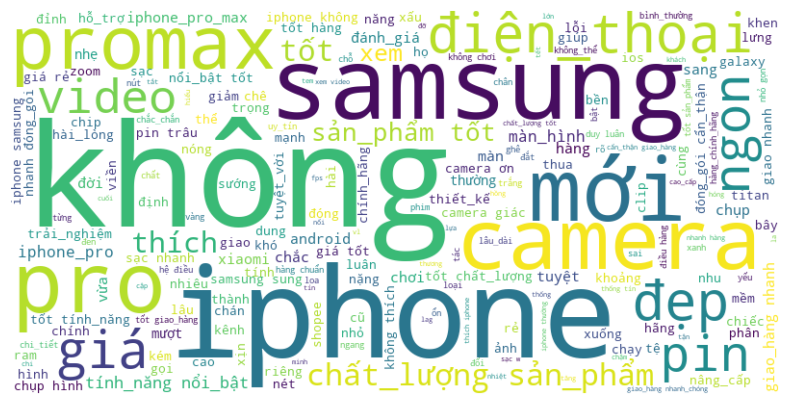

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_word_cloud(new_lines):
    # Combine all lines into a single text string
    full_text = ' '.join(new_lines)
    
    # Create the word cloud object, set the size and background color
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(full_text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis labels
    plt.show()

create_word_cloud(new_lines)

In [56]:
comments_df = pd.DataFrame(new_lines, columns=['content_cmt'])

In [57]:
comments_df

,content_cmt
0,hàng_chính_hãng không
1,hồng siêu yêu
2,gói_hàng cẩn_thận giao_hàng nhanh
3,tuyệt chất_lượng giao_hàng nhanh
4,sản_phẩm chính_hãng
...,...
28072,viền samsung sạc w đê
28073,sạc vừa
28074,pro nổi
28075,promax mới cay_cú


In [58]:
comments_df.to_csv('Comment_data.csv', mode='a', header=not os.path.exists('Comment_data.csv'), index=False, encoding='utf-8-sig')

In [27]:
# comments_df = pd.read_csv(r"D:\projects\NCKH\Data_Processing\Comment_seg.csv")
# new_lines = comments_df['sentence'].to_list()

In [28]:
# new_lines

In [29]:
# positive_keywords = [ 'tốt', 'đẹp', 'hài lòng', 'iu', 'cẩn thận', '10 điểm',
#     'siêu', 'nhanh', 'hài lòng', 'cẩn thận'
#     "cưng xiu", "triệu like", "không phải lo", "nhanh chóng", "an toàn", "uy tín",
#     "tem mới", "nguyên đai nguyên kiện", "hàng mới", "giao hàng bằng máy bay", "tặng shop 10 sao", "cảm ơn nhiều", "lâu dài"
# ]
# negative_keywords = ['tệ', 'không hài lòng', 'thất vọng', 'chậm', 'lỗi', 'hỏng', 'lâu', 'tụt','dỏm','lừa']

# def assign_sentiment_improved(comment):
#     comment_lower = comment.lower()
#     for positive in positive_keywords:
#         if positive in comment_lower:
#             return "positive"
#     for negative in negative_keywords:
#         if negative in comment_lower:
#             return "negative"
#     # Sử dụng underthesea chỉ khi không tìm thấy từ khoá
#     return sentiment(comment)

# sentiments = []
# for sentence in new_lines:
#     refined_sentiment = assign_sentiment_improved(sentence)
#     sentiments.append({
#         'sentence': sentence,
#         'sentiment': refined_sentiment
#     })


In [30]:
# df = pd.DataFrame(sentiments)

In [31]:
# df.to_csv('Comment_segement11.csv', mode='a', header=not os.path.exists('Comment_segement11.csv'), index=False, encoding='utf-8-sig')